<a href="https://colab.research.google.com/github/Keita062/work/blob/main/%E8%AA%B2%E9%A1%8C%E5%AE%8C%E6%88%90(12.09).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev

In [2]:
df = pd.read_csv('/content/DA_kai (1).csv')

In [3]:
fixedLX = df['leftX']
fixedLX = fixedLX.replace(0, np.nan)

fixedLY = df['leftY']
fixedLY = fixedLY.replace(0, np.nan)

fixedRX = df['rightX']
fixedRX = fixedRX.replace(0, np.nan)

fixedRY = df['rightY']
fixedRY = fixedRY.replace(0, np.nan)

fixedLX = fixedLX.interpolate();
fixedLY= fixedLY.interpolate();
fixedRX = fixedRX.interpolate();
fixedRY=fixedRY.interpolate();
df=pd.concat( [df, fixedLX, fixedLY, fixedRX, fixedRY] , axis=1)

AVRGX=(df.iloc[:,9]+df.iloc[:,11])/2.0
AVRGY=(df.iloc[:,10]+df.iloc[:,12])/2.0
AVR = pd.concat( [AVRGX, AVRGY ], axis=1)

EiRes =pd.DataFrame( [range(0,18),range(0,18),range(0,18),range(0,18)]).T
for i in range(0,18):
    st = i*150
    en = st+150
    tmp = AVR.iloc[st:en, : ]
    EiRes.iloc[i,0]=tmp.mean()[0]
    EiRes.iloc[i,1]=tmp.mean()[1]
    EiRes.iloc[i,2]=tmp[0].std()
    EiRes.iloc[i,3]=tmp[1].std()

<ipython-input-3-04afcb76341a>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '961.6384365771813' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  EiRes.iloc[i,0]=tmp.mean()[0]
<ipython-input-3-04afcb76341a>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '500.75569714765106' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  EiRes.iloc[i,1]=tmp.mean()[1]
<ipython-input-3-04afcb76341a>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.803060328969313' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  EiRes.iloc[i,2]=tmp[0].std()
<ipython-input-3-04afcb76341a>:31: FutureWarning: Setting an item of incompatible dtype is de

In [4]:
EiRes.head()

,0,1,2,3
0,961.638437,500.755697,16.803060,39.791667
1,884.739276,427.181175,112.018256,11.963872
2,943.447780,464.002477,61.717499,46.340738
3,1085.406327,500.784545,265.062978,48.435830
4,977.251895,488.880218,153.170744,117.483621


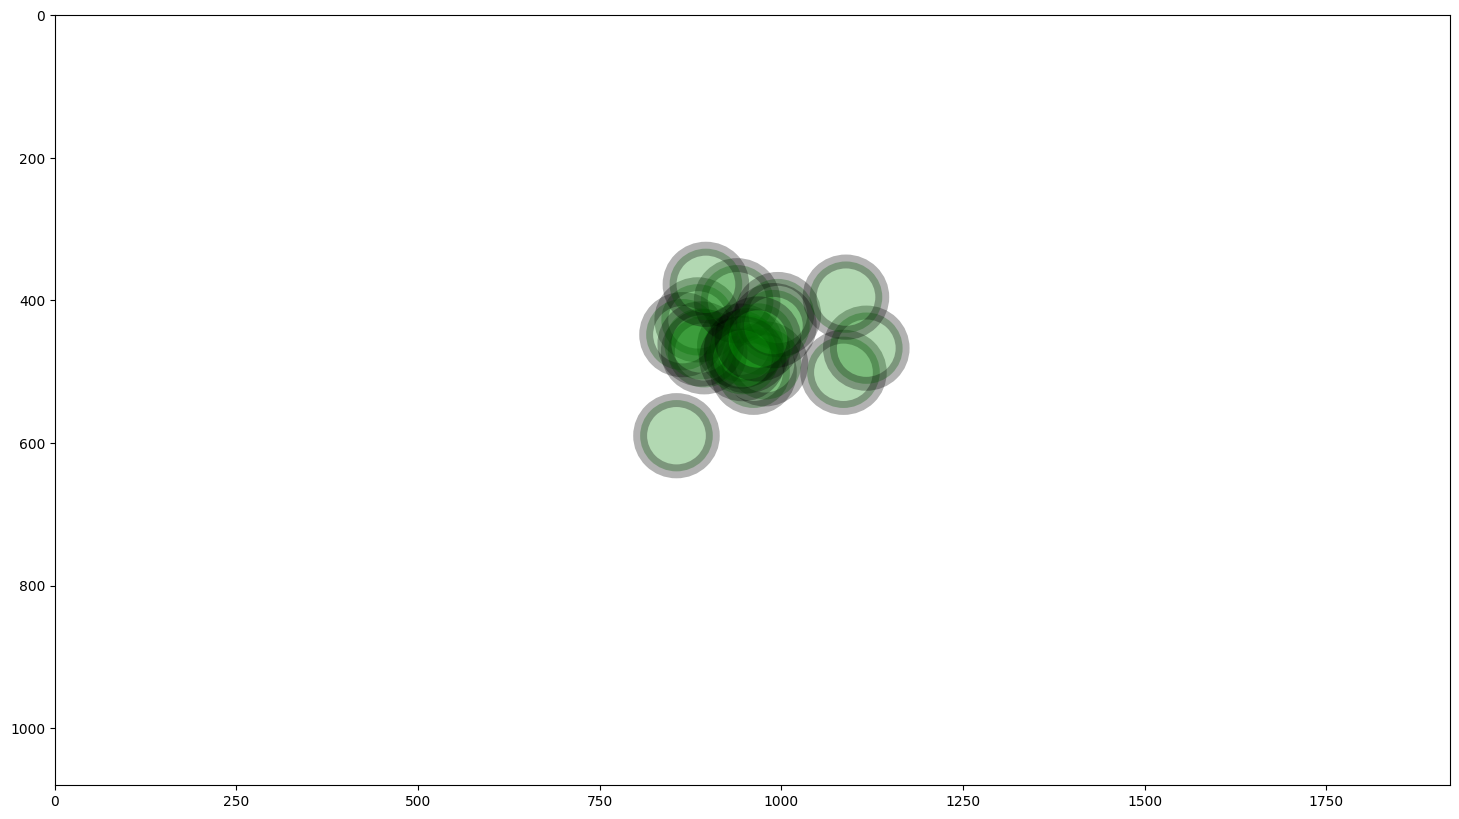

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

fig, ax = plt.subplots(figsize=(18, 10))
plt.xlim([0, 1920])
plt.ylim([0, 1080])
ax.invert_yaxis()

for i in range(0, EiRes.shape[0]):
    ax.add_patch(ptc.Circle(xy=(EiRes.iloc[i, 0], EiRes.iloc[i, 1]), radius=50, alpha=0.3, ec="black",fc="green",linewidth = 10))

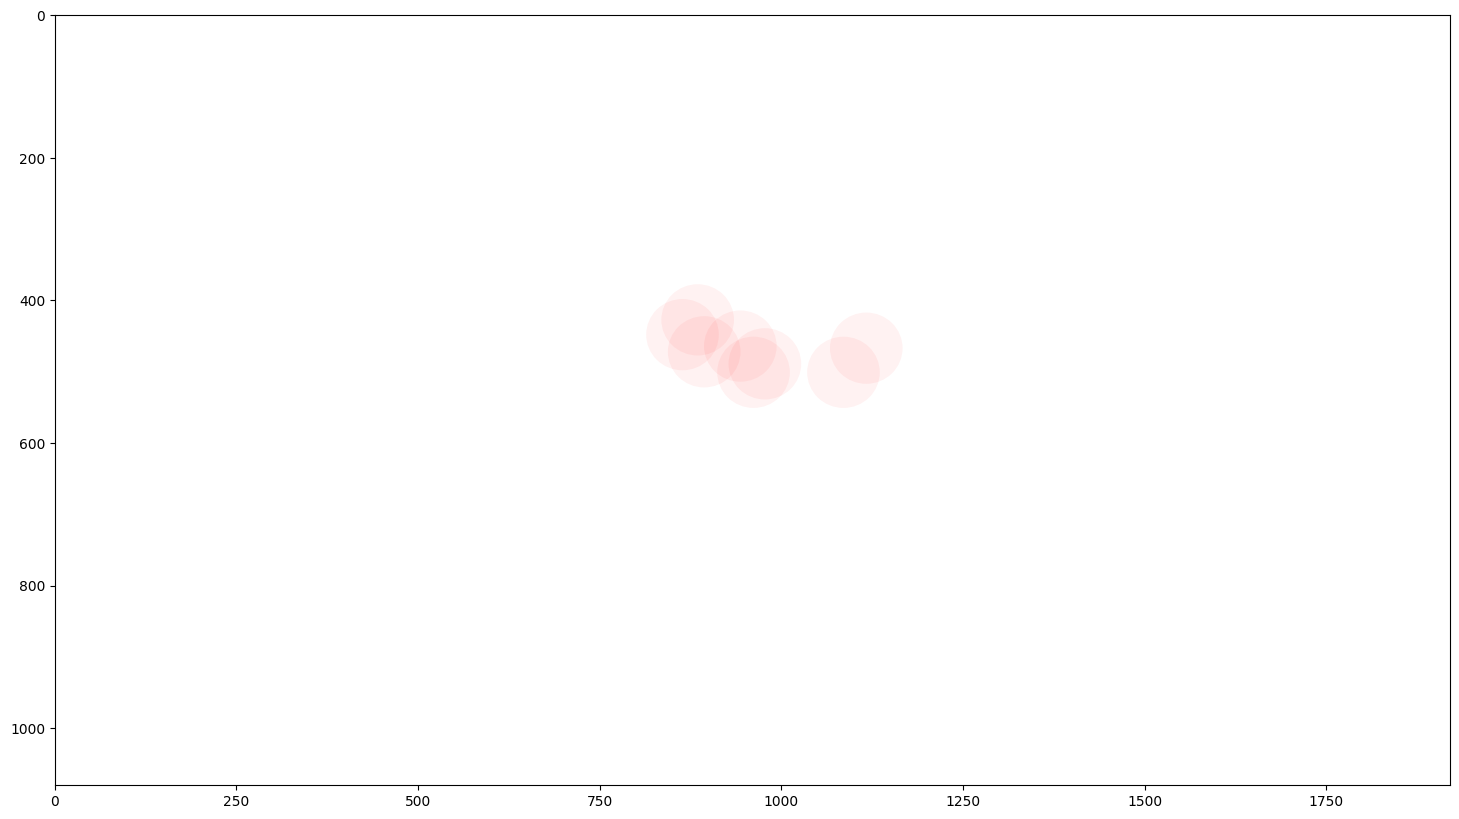

In [6]:
fig, ax = plt.subplots(figsize=(18, 10))
plt.xlim([0, 1920])
plt.ylim([0, 1080])
ax.invert_yaxis()

for i in range(0,8):
    ax.add_patch(ptc.Circle(xy=(EiRes.iloc[i, 0], EiRes.iloc[i, 1]), radius=50, alpha=0.05, fc="red",linewidth = 10))

In [7]:
import matplotlib.image as mpimg

In [9]:
from PIL import Image

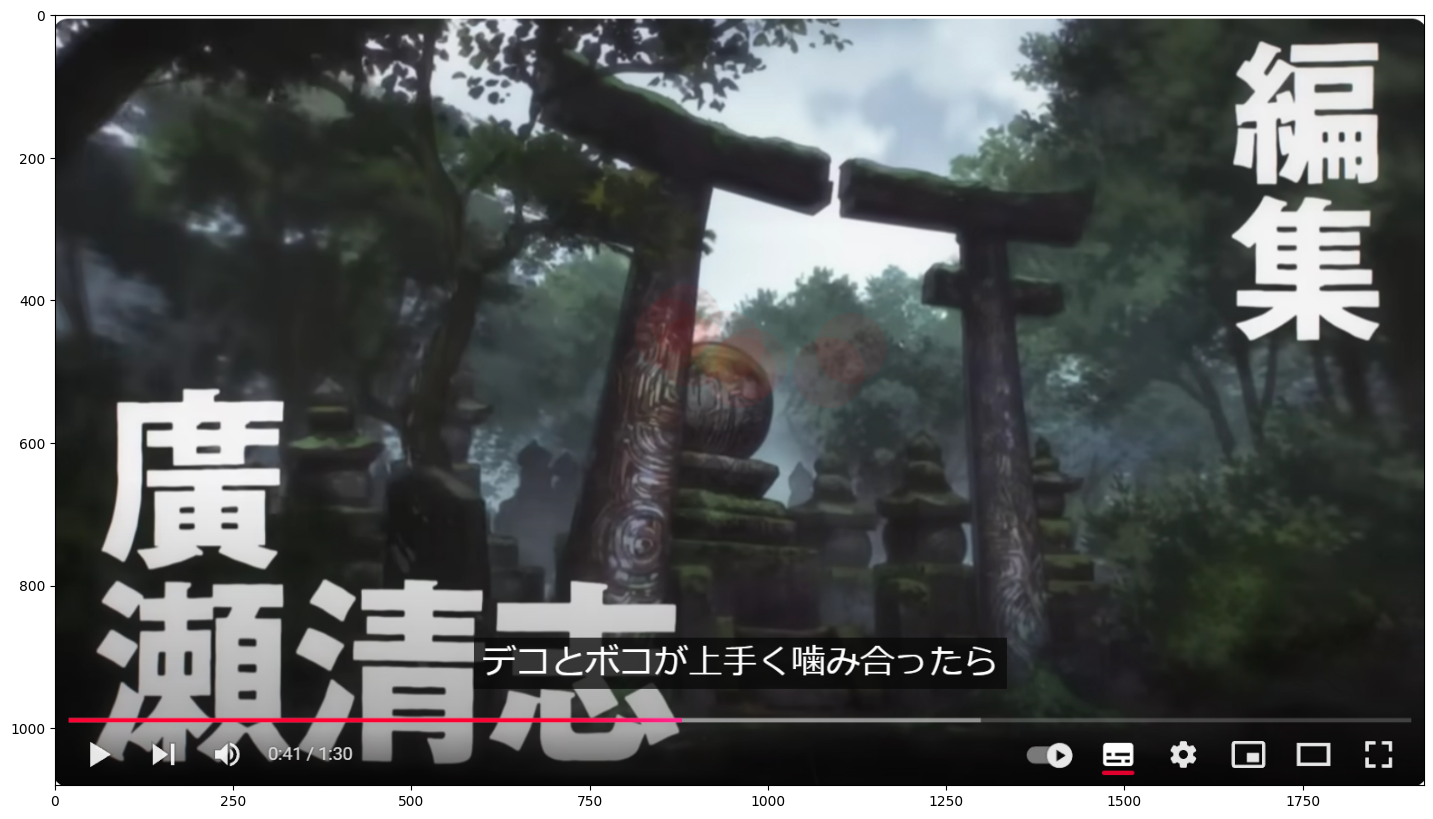

In [13]:
# 背景画像の読み込み
background_image = mpimg.imread('/content/スクリーンショット 2024-11-19 171124 (1).png')  # ファイルパスを指定

# プロット作成
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(background_image, extent=[0, 1920, 1080, 0])  # 画像を背景に設定（座標系を合わせる）

# 座標軸の設定
plt.xlim([0, 1920])
plt.ylim([0, 1080])
ax.invert_yaxis()  # Y軸を反転（画像に合わせる）

# 円を描画
for i in range(0, 8):
    ax.add_patch(ptc.Circle(xy=(EiRes.iloc[i, 0], EiRes.iloc[i, 1]), radius=50, alpha=0.05, fc="red", linewidth=10))

plt.show()

# プロットを画像として保存
fig.savefig('/content/output_plot.png', dpi=300, bbox_inches='tight')